In [2]:
from urllib.request import urlretrieve
url = "https://archive.ics.uci.edu" + \
    "/ml/machine-learning-databases/wine-quality" + \
    "/winequality-white.csv"
savepath = "winequality-white.csv"
urlretrieve(url, savepath)

('winequality-white.csv', <http.client.HTTPMessage at 0x1a25551ab08>)

In [3]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# 데이터를 레이블과 데이터로 분리하기 
y = wine["quality"]
x = wine.drop("quality", axis=1)

# 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2)

# 학습하기
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 평가하기
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.10      0.16        29
           5       0.72      0.71      0.71       292
           6       0.66      0.78      0.72       436
           7       0.67      0.54      0.59       175
           8       1.00      0.48      0.65        42
           9       0.00      0.00      0.00         3

    accuracy                           0.68       980
   macro avg       0.48      0.37      0.40       980
weighted avg       0.68      0.68      0.67       980

정답률= 0.6806122448979591


C:\Users\82108\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


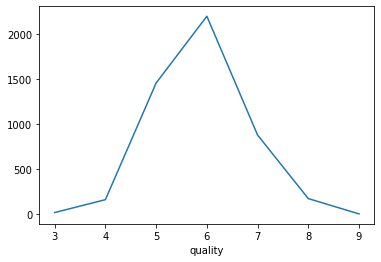

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# 와인 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# 품질 데이터별로 그룹을 나누고 수 세어보기
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

# 수를 그래프로 그리기
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

In [11]:
# y레이블 변경하기
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else :
        newlist += [2]
y = newlist

In [14]:
# 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# 데이터를 레이블과 데이터로 분리하기
y = wine["quality"]
x = wine.drop("quality", axis=1)

# y 레이블 변경하기
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else :
        newlist += [2]
y = newlist

# 학습 전용과 테스트 전용으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 학습하기
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 평가하기
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.16      0.26        37
           1       0.94      1.00      0.97       904
           2       1.00      0.38      0.56        39

    accuracy                           0.94       980
   macro avg       0.85      0.51      0.59       980
weighted avg       0.93      0.94      0.92       980

정답률= 0.939795918367347
